# Data Science I Topic 4 - Feature Extraction of Images

Feature extraction techniques are important in image processing and computer vision for tasks like character or object recognition and segmentation. By extracting features from the images, we also reduce the dimensionality of the data which in turns may increase training and prediction speed as well as the accuracy.

In this tutorial, we will explore some image feature extraction techniques using `scikit-image`. In `scikit-image`, the images are saved as standard `numpy` array, not as a special image class.

Let us see first an example of a gray scale image.

In [46]:
# Run this cell

import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Import the camera image and save it as an array I
from skimage.data import camera
I = camera()

# Complete the following to show the info about the image
print("Type:", type(I))
print("dtype:", I.dtype)
print("shape", I.shape)
print("Values min:", I.min())
print("Values max:", I.max())

Type: <class 'numpy.ndarray'>
dtype: uint8
shape (512, 512)
Values min: 0
Values max: 255


**Q**: What's the range of the pixel values, what do they correspond to?

**A**: 0 to 255 for unsigned 8 bit integer, 0 corresponds to black, 255 white

<u>Let's show the image.</u>

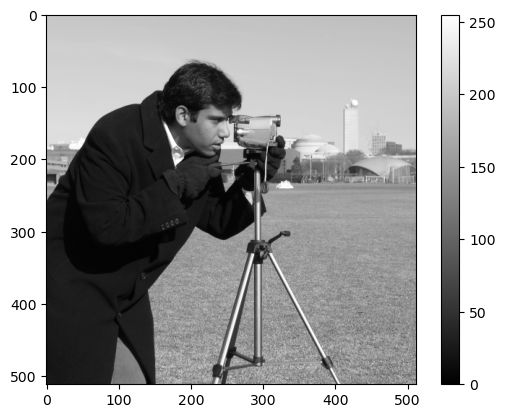

In [48]:
# Run the cell below
plt.imshow(I, cmap="gray")
plt.colorbar();

We can convert the intensity range of the image from 0-255 (uint8) to 0-1 (float), which may be necessary along your research pipeline.

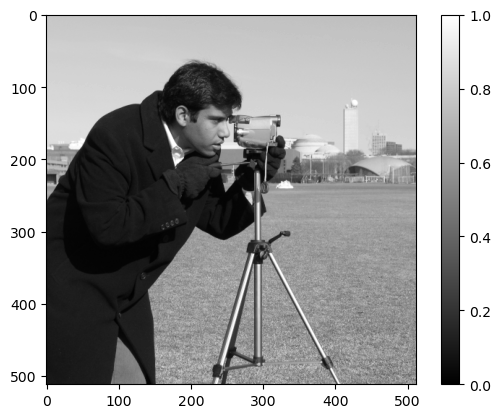

In [49]:
from skimage import img_as_float

J = img_as_float(I)

# Show the image J together with the colorbar. Notice the range now.
plt.imshow(J, cmap="gray")
plt.colorbar();

A feature descriptor is a simplified representation of the image that contains only the most important information about the image. We discuss here what feature descriptors one may derive from an image.

## Raw gray scale pixel values

The simplest feature is the raw pixel values.

**Q**: For our `camera` picture, how many features are there and how do we arrange these features to be used in, say, a classifier?

**A**: 512x512=262,144 features

In [50]:
J

array([[0.78431373, 0.78431373, 0.78431373, ..., 0.74117647, 0.74509804,
        0.74509804],
       [0.78431373, 0.78039216, 0.78039216, ..., 0.74509804, 0.74509804,
        0.74509804],
       [0.78039216, 0.78039216, 0.78039216, ..., 0.74509804, 0.74509804,
        0.74509804],
       ...,
       [0.09803922, 0.09803922, 0.10588235, ..., 0.54509804, 0.47843137,
        0.57647059],
       [0.09803922, 0.09803922, 0.10196078, ..., 0.61960784, 0.55294118,
        0.65882353],
       [0.09803922, 0.09803922, 0.10588235, ..., 0.59215686, 0.59607843,
        0.58431373]])

## Average of RGB values

Let's first import a color image from `skimage.data`.

In [51]:
from skimage.data import chelsea
I = chelsea()

# fill in the following
print("Type:", type(I))
print("dtype:", I.dtype)
print("shape", I.shape)
print("Values min [R G B]:", I[:, :, 0].max(), I[:, :, 1].max(), I[:, :, 2].max())
print("Values max [R G B]:", I[:, :, 0].min(), I[:, :, 1].min(), I[:, :, 2].min())

Type: <class 'numpy.ndarray'>
dtype: uint8
shape (300, 451, 3)
Values min [R G B]: 215 189 231
Values max [R G B]: 2 4 0


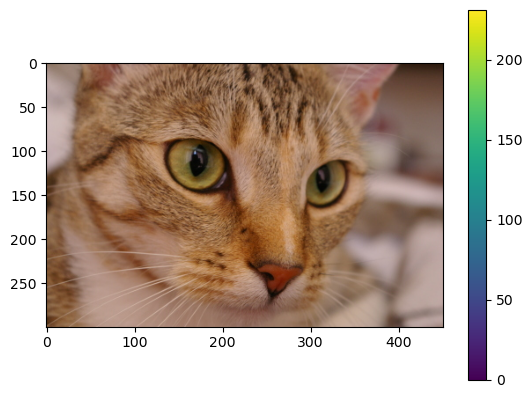

In [52]:
# Show the color image
plt.imshow(I)
plt.colorbar();

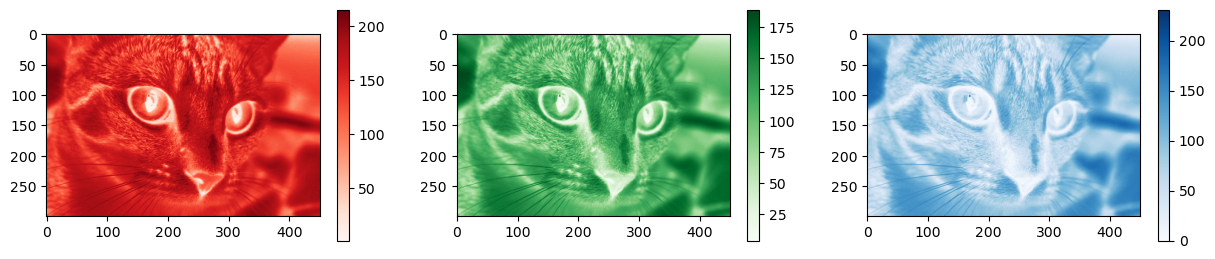

In [53]:
# Here we visualize all the three channels
# Complete the following

# Split each channel
r = I[:, :, 0]
g = I[:, :, 1]
b = I[:,:, 2]

fig, axs = plt.subplots(1, 3, figsize=(15,3))

# Red channel
rx = axs[0].imshow(r, cmap='Reds')
fig.colorbar(rx, ax=axs[0])

# Green
rx = axs[1].imshow(g, cmap='Greens')
fig.colorbar(rx, ax=axs[1])

# Blue
rx = axs[2].imshow(b, cmap='Blues')
fig.colorbar(rx, ax=axs[2])

plt.show()

<u>Converting RGB to Gray values: Is it the same with averaging the 3 channels?<\u>

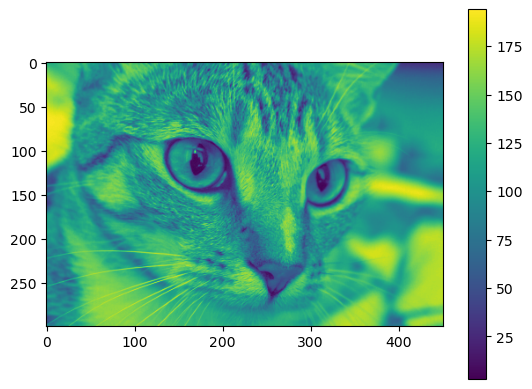

In [54]:
# Now average the channels and display it
I_ave = (np.average(I, axis=2)).astype(np.uint8)
# I_ave = (0.299*r + 0.587*g + 0.114*b).astype(np.uint8)
plt.imshow(I_ave)
plt.colorbar();

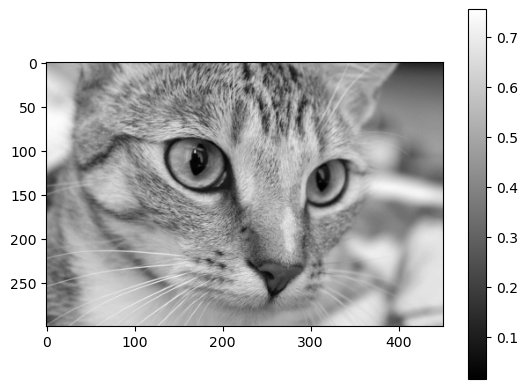

In [55]:
from skimage.color import rgb2gray
I_rgb2gray = rgb2gray(I) # Gray = 0.299*r + 0.587*g + 0.114*b
plt.imshow(I_rgb2gray, cmap="gray")
plt.colorbar();

## Edge Features

Edge is where there is a sharp change in color. Let's use again the black and white `camera` image.

In [56]:
# Get the camera image
I = camera()

We'll compare the results of four edge detectors: `roberts`, `sobel`, `scharr`, and `prewitt`.

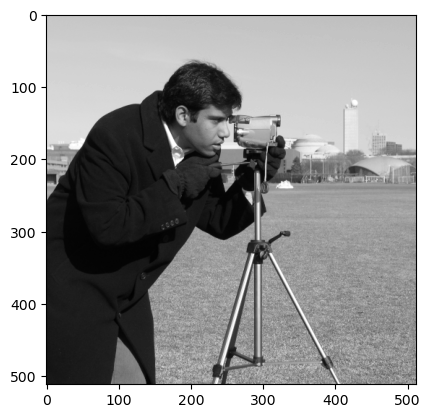

In [57]:
plt.imshow(I,cmap='gray')

In [58]:
# Print out the kernels for these four edge detectors.
print("Roberts \n", np.array([[1,0], [0,-1]])) # the result is Gx
print(np.array([[0,1], [-1,0]])) #Gy

Roberts 
 [[ 1  0]
 [ 0 -1]]
[[ 0  1]
 [-1  0]]


In [59]:
print("Sobel \n", np.array([[1,0,-1], [2,0,-2], [1,0,-1]])) # the result is Gx
print(np.array([[1,2,1], [0,0,0], [-1,-2,-1]])) #Gy

Sobel 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [60]:
print("Scharr \n", np.array([[47,0,-47], [162,0,-162], [47,0,-47]])) # the result is Gx
print(np.array([[47,162,47], [0,0,0], [-47,-162,-47]])) #Gy

Scharr 
 [[  47    0  -47]
 [ 162    0 -162]
 [  47    0  -47]]
[[  47  162   47]
 [   0    0    0]
 [ -47 -162  -47]]


In [61]:
print("Prewitt \n", np.array([[1,0,-1], [1,0,-1], [1,0,-1]])) # the result is Gx
print(np.array([[1,1,1], [0,0,0], [-1,-1,-1]])) #Gy

Prewitt 
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


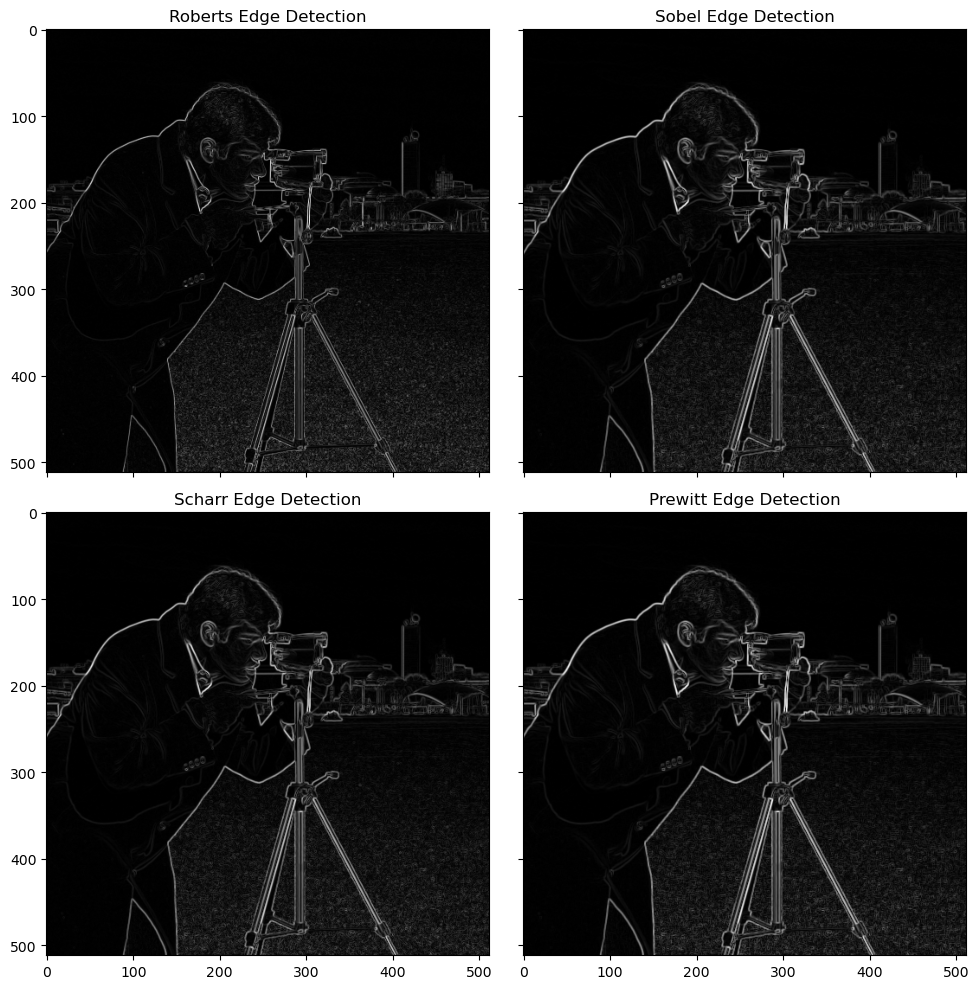

In [62]:
from skimage.filters import roberts, sobel, scharr, prewitt

# Complete the following
I_roberts = roberts(I)
I_sobel = sobel(I)
I_scharr = scharr(I)
I_prewitt = prewitt(I)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0,0].imshow(I_roberts, cmap="gray")
ax[0,0].set_title('Roberts Edge Detection')

ax[0,1].imshow(I_sobel, cmap="gray")
ax[0,1].set_title('Sobel Edge Detection')

ax[1,0].imshow(I_scharr, cmap="gray")
ax[1,0].set_title('Scharr Edge Detection')

ax[1,1].imshow(I_prewitt, cmap="gray")
ax[1,1].set_title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()

In [67]:
print("Initial Shape: ", I.shape)
print("Robert Shape: ", I_roberts.shape)
print("Maximum Soebel", I_roberts.max())
print("Minimum Roberts", I_roberts.min())

Initial Shape:  (512, 512)
Robert Shape:  (512, 512)
Maximum Soebel 0.731438255998114
Minimum Roberts 0.0


**Q**: What might be the problem with edge detectors?

**Ans**:
Edge detectors, while useful for highlighting regions with strong intensity changes, have several limitations that can pose challenges in various image processing and computer vision tasks. Here are some common problems associated with edge detectors:

### 1. **Sensitivity to Noise**
   - **Issue**: Edge detectors are highly sensitive to noise in the image. Even small amounts of noise can create false edges or obscure real edges.
   - **Impact**: This can result in a noisy edge map, making it difficult to discern meaningful structures in the image.

### 2. **Lack of Orientation Information**
   - **Issue**: Simple edge detectors like Sobel or Roberts do not provide detailed information about the orientation and magnitude of edges, only the presence of edges.
   - **Impact**: This lack of detailed edge information can make it harder to distinguish between different shapes and objects in the image.

### 3. **Illumination and Contrast Sensitivity**
   - **Issue**: Edge detectors can be significantly affected by changes in lighting conditions or image contrast. Variations in illumination can either enhance or suppress edges, leading to inconsistent results.
   - **Impact**: This can make edge detection unreliable for images captured under varying lighting conditions.

### 4. **Thresholding Challenges**
   - **Issue**: Many edge detection algorithms require setting a threshold to determine which gradient magnitudes correspond to edges. Choosing an appropriate threshold can be difficult and often requires tuning.
   - **Impact**: Incorrect thresholding can either miss important edges (too high a threshold) or detect too many irrelevant edges (too low a threshold).

### 5. **Lack of Spatial Context**
   - **Issue**: Edge detectors analyze each pixel or small neighborhood independently, without considering larger spatial structures or patterns in the image.
   - **Impact**: This can lead to fragmented edge maps where edges are detected but not connected into coherent boundaries, making higher-level image analysis tasks more difficult.

### 6. **Limited to Binary Decisions**
   - **Issue**: Edge detectors typically produce binary maps of edges (edge or no edge) without additional information about the region properties.
   - **Impact**: This binary nature limits the usefulness of edge maps for tasks that require more nuanced information, such as texture analysis or complex object recognition.

### Summary

While edge detectors are effective for basic edge highlighting, their sensitivity to noise, lack of orientation and magnitude information, and susceptibility to lighting changes limit their effectiveness in more complex image analysis tasks. These limitations can hinder applications like object detection, recognition, and segmentation, where more robust and detailed feature representations (such as HOG) are often required.




Next we'll see more methods that tackle this problem.

## Histogram of Oriented Gradients (HOG)

**Research**:

What is the advantage of HOG over an edge detector? Briefly summarize the algorithm.

**Ans**:
### Advantages of HOG over Edge Detectors

1. **Rich Feature Representation**: HOG captures not just the presence of edges but also their orientations and magnitudes, providing more detailed information about the shape and structure of objects.
2. **Spatial Relationships**: By dividing the image into cells and blocks, HOG maintains spatial relationships between edges, which is crucial for recognizing objects.
3. **Normalization**: HOG includes normalization steps that make the descriptor invariant to changes in illumination and shadowing, which simple edge detectors do not handle.
4. **Robustness**: The descriptor is robust to small changes in shape and appearance, making it effective for detecting objects in various poses and lighting conditions.
5. **Object Detection**: HOG is particularly well-suited for object detection tasks, such as pedestrian and vehicle detection, due to its comprehensive feature set.

### HOG Algorithm Summary

1. **Gradient Computation**:
   - Compute the gradient of the image using filters like Sobel to highlight regions with strong intensity changes (edges).

2. **Orientation Binning**:
   - Divide the image into small, connected regions called cells.
   - For each cell, compute a histogram of gradient directions (orientations).
   - Use the gradient magnitude as the weight for each orientation in the histogram.

3. **Block Normalization**:
   - Group cells into larger blocks.
   - Normalize the histograms within each block to account for changes in illumination and contrast.

4. **Descriptor Formation**:
   - Concatenate the normalized histograms from all blocks to form a single feature vector for the entire image or a sub-region of the image.

This process results in a feature vector that captures the distribution and intensity of edges in various orientations across the image, making it a powerful tool for object detection and recognition tasks.

We are going to first resize our `camera` image to 64x128 (commonly used size, which was also used in the original paper).

(128, 64)


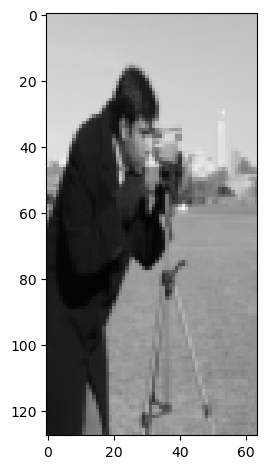

In [44]:
from skimage.transform import resize
from skimage.feature import hog
from skimage.io import imshow

# Enter the size in (row,column) form that corresponds to
# width x height of 64x128
J = resize(I, (128,64))

# print the shape of J
print(J.shape)

imshow(J);

In [45]:
hog_features, hog_image = hog(J,
                              pixels_per_cell=(16, 16), # Try to change this to say 8,8
                              cells_per_block=(2, 2), # For histogram normalization
                              visualize=True
                             )

# Print the dimension of the hog_features
hog_features.shape

(756,)

For the whole image, how many resulting features?

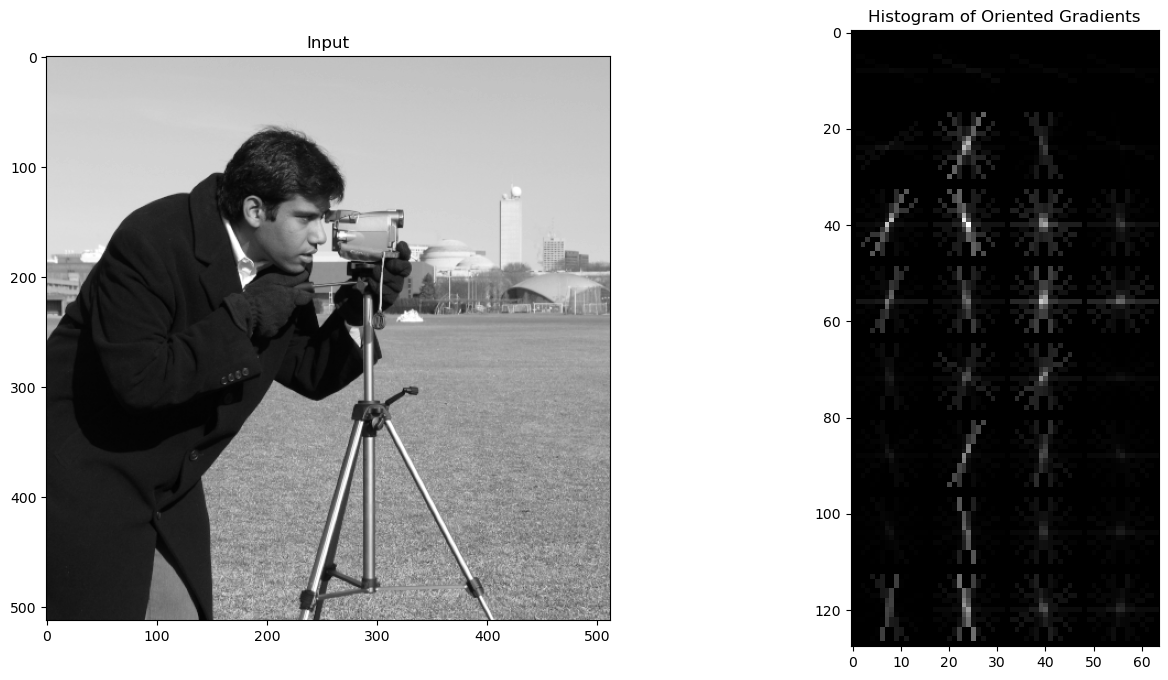

In [68]:
# Here we show the input and the HOG images side by side
from skimage import exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(J, cmap="gray")
ax1.set_title('Input')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.imshow(hog_image, cmap="gray")
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

## Other descriptors

**Research question**:
Briefly summarize the (1) Scale Invariant Feature Transform (SIFT) and (2) Speeded-up Robust Feature (SURF).